In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Cargo el fichero
X = pd.read_csv("train_housing_prices.csv", delimiter = ',')


In [ ]:
X.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


2. Missings. Primero vamos a realizar el tratamiento de missings:\
Crea una tabla con el % de missings y el tipo de cada variable del dataframe.\
Elimina aquellas variables con más de un 80% de missings\
Imputa los missings de las variables categóricas a la categoría “Missing” en cada variable. \
Imputa los missings de las variables continuas a la mediana de cada variable.\


In [ ]:
#calculo missings
X.isnull().sum()
#En porcentaje
col_data=X.isnull().sum()/X.isnull().count()
col_data

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [ ]:
dt_miss=pd.DataFrame([col_data,X.dtypes]).T
dt_miss.columns = ['percentage','type']

In [ ]:
dt_miss

,percentage,type
Id,0.0,int64
MSSubClass,0.0,int64
MSZoning,0.0,object
LotFrontage,0.177397,float64
LotArea,0.0,int64
...,...,...
MoSold,0.0,int64
YrSold,0.0,int64
SaleType,0.0,object
SaleCondition,0.0,object


In [ ]:
col_data[col_data>0.80]

Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

In [ ]:
df=X.loc[:,~X.columns.isin(col_data[col_data>0.80].index)]


In [ ]:
df.drop(columns=['Id'], inplace= True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\4086763791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Id'], inplace= True)


In [ ]:
lista_numericas = df._get_numeric_data().columns
df_num=df[lista_numericas]

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df_num) # calculo la media de cada columna (se guarda dentro del imputer) // en un futuro -> ajuste o entreno del modelo
df_num_imp = imputer.transform(df_num) ## relleno los missings // en un futuro -> el que predice los valores
#df_num_imp = imputer.fit_transform(df_num)
df_num_imp

array([[6.00000e+01, 6.50000e+01, 8.45000e+03, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+01, 8.00000e+01, 9.60000e+03, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [6.00000e+01, 6.80000e+01, 1.12500e+04, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [7.00000e+01, 6.60000e+01, 9.04200e+03, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [2.00000e+01, 6.80000e+01, 9.71700e+03, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [2.00000e+01, 7.50000e+01, 9.93700e+03, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [ ]:
df[lista_numericas]=df_num_imp

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\54095818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lista_numericas]=df_num_imp


In [ ]:
df_cat = df.drop(lista_numericas, axis=1)
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
df.replace(np.nan,'Missing', inplace=True)

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\1231603027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(np.nan,'Missing', inplace=True)


In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

3. Análisis variable respuesta: La variable respuesta es SalesPrice, precio de venta.\
    a. Describe la variable, verifica que no tenga valores negativos y analiza la distribución empírica.
    b.¿Cumple las características de una distribución normal?
        ¿Está centrada?
        ¿Dónde se acumulan la mayor parte de los valores?
        ¿Las colas son iguales?
    c.Piensa y busca qué transformación simple se puede aplicar para conseguir una variable más parecida a una normal (raíz cuadrada, potencia al cuadrado, exponencial, logaritmo…?).Aplica la transformación y verifica que la nueva distribución se parece más a una normal. Continua todo el análisis con la variable SalesPrice transformada.


In [ ]:
df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
# a
df['SalePrice'].describe() #no tiene valores negativos! genial


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\1848999635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


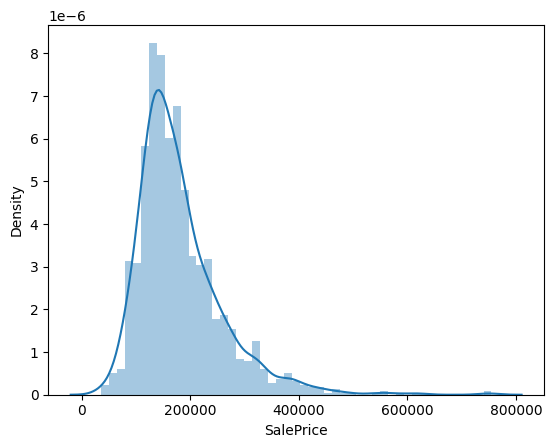

In [ ]:
sns.distplot(df['SalePrice'])
plt.show()

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\1293526115.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['SalePrice'])) #simetrica, cierta normalidad! Mucho mejor


<Axes: xlabel='SalePrice', ylabel='Density'>

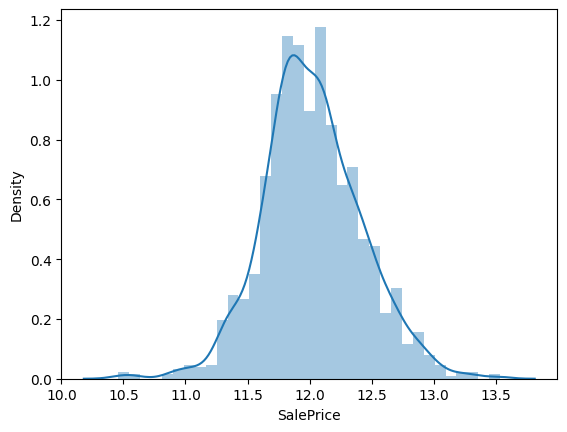

In [ ]:
#3c
sns.distplot(np.log(df['SalePrice'])) #simetrica, cierta normalidad! Mucho mejor


In [ ]:
df['SalePrice'] = np.log(df['SalePrice'])

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\4189967672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SalePrice'] = np.log(df['SalePrice'])


In [ ]:
df=df._get_numeric_data()

5. Análisis gráfico y transformación de variables: Ahora vamos a realizar el análisis gráfico de las 9 variables que están más correlacionadas con SalesPrice. Para cada variable:\
    a. Gráfica la distribución/histograma y verifica el tipo de variable. Algunas variables categóricas vienen como tipo continuo.\
    b. Si son variables categóricas, verifica si es posible unificar categorías. Para ello realiza el análisis bivariante con los gráficos boxplot de cada categoría. [Por ejemplo, puedes agrupar categorías de la variable OverallQual] \
    c. Si son variables continuas, verifica que no tengan outliers. Para ello realiza el análisis bivariante con el scatter. [Por ejemplo, puedes eliminar 2 outliers de la variable GrLivArea] \
    d. Si son variables continuas, verifica que no tengan demasiada asimetría y en caso de que tengan demasiada, realiza la transformación log. Para ello realiza el análisis univariante con la distribución y calcula la skewness. [Por ejemplo, GrLivArea presenta mucha asimetría]\


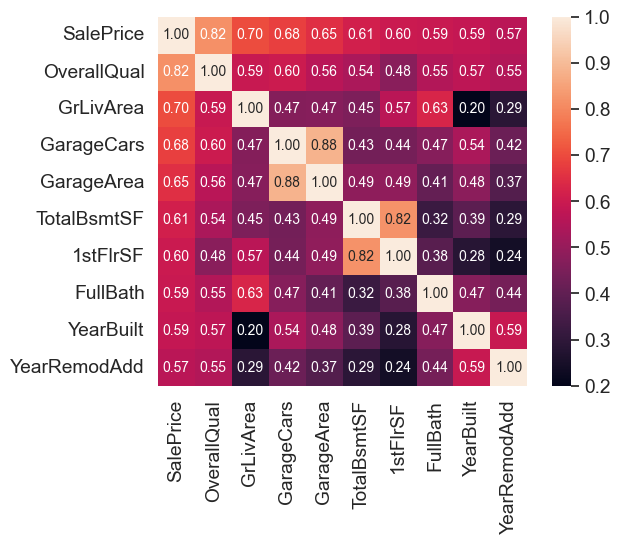

In [ ]:
corrmat = df.corr()
k = 10 #numero de variables (son 9 + la propia variable)
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# aqui me quedo solo las 10 que hemos visto
Z = df[cols].copy()
Z.columns.values
Z.dtypes

SalePrice       float64
OverallQual     float64
GrLivArea       float64
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
1stFlrSF        float64
FullBath        float64
YearBuilt       float64
YearRemodAdd    float64
dtype: object

### OverallQual

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\2899105129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['OverallQual']); #es categorica ordinal, transformamos?


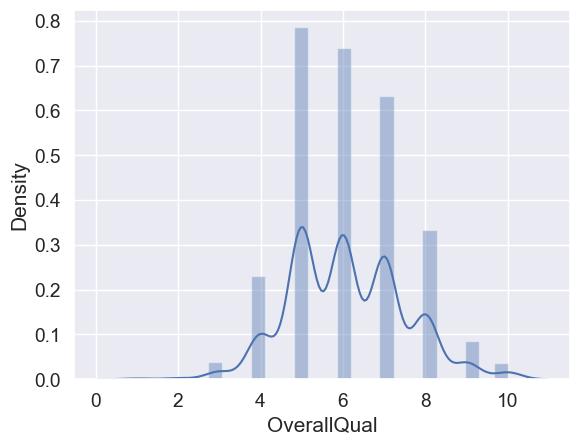

In [ ]:
#OverallQual: overall quality
sns.distplot(Z['OverallQual']); #es categorica ordinal, transformamos?

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

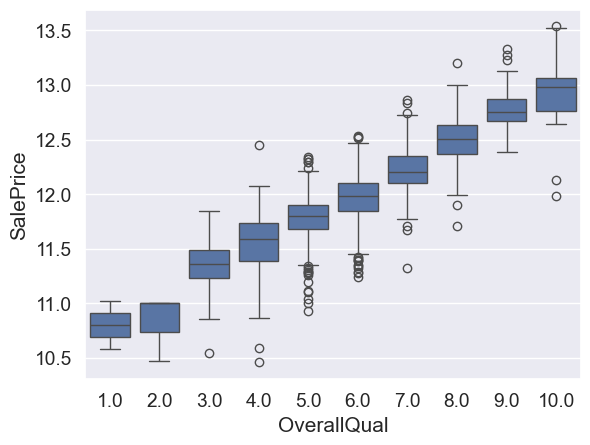

In [ ]:
sns.boxplot(x=Z['OverallQual'], y=Z['SalePrice']) #claramente crece, podemos juntar categorias

In [ ]:
Z['OverallQual'] = Z.OverallQual.replace({1:1, 2:1, 3:2, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:3})

In [ ]:
Z['OverallQual'] = Z['OverallQual'].astype('category')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

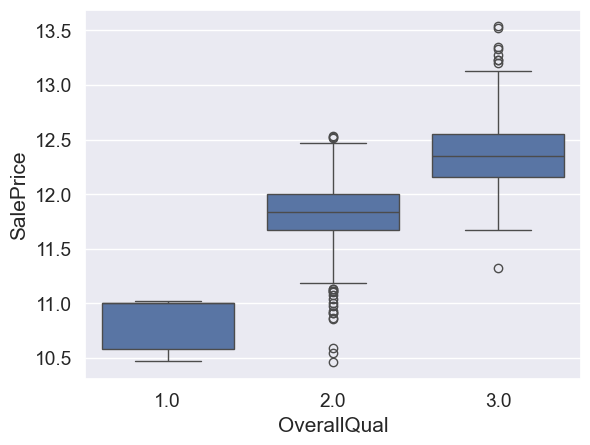

In [ ]:
sns.boxplot(x=Z['OverallQual'],y= Z['SalePrice'])

### GrLivArea

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\583120609.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['GrLivArea']); #es continua, pero cola pesada


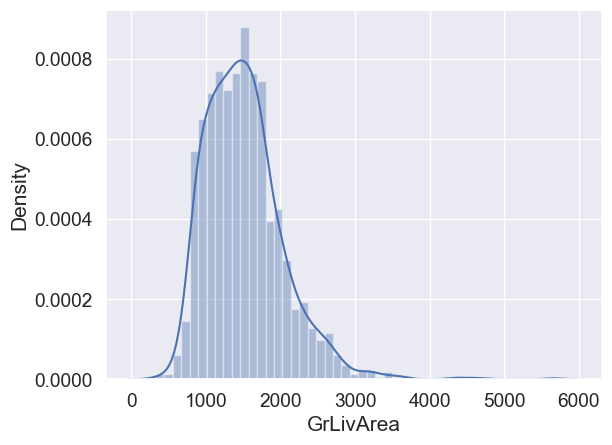

In [ ]:
#GrLivArea: area para vivir por encima del suelo (no sotanos)
sns.distplot(Z['GrLivArea']); #es continua, pero cola pesada

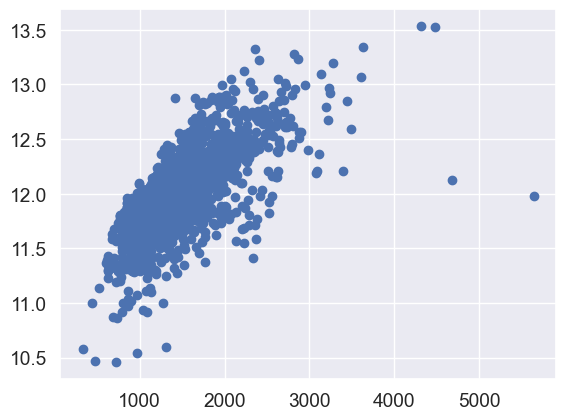

In [ ]:
plt.scatter(Z['GrLivArea'], Z['SalePrice'])

In [ ]:
#2 outliers, eliminar
Z = Z[Z.GrLivArea < 4500]
Z.GrLivArea.skew() #muy asimetrica, un 0 indicaría simetrica, buscamos simetria aplicando el log


1.0109917025385513

In [ ]:
Z["GrLivArea"] = np.log(Z["GrLivArea"])
Z.GrLivArea.skew()  #la simetría no es necesaria, puede ser deseable! Buscar info!


-0.07181927264805592

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\1807600428.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['GrLivArea']);


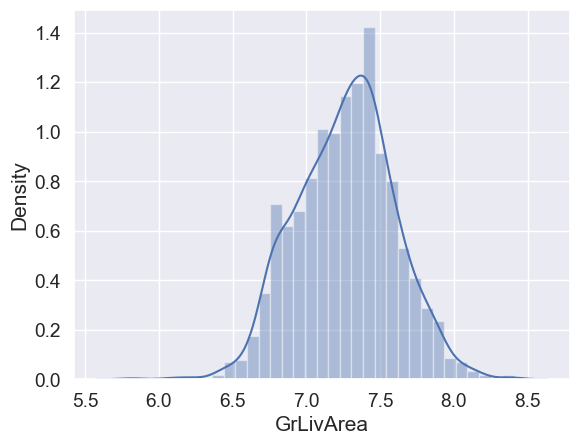

In [ ]:
sns.distplot(Z['GrLivArea']);

### GarageCars

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\3646816012.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['GarageCars']); #es categorica ordinal


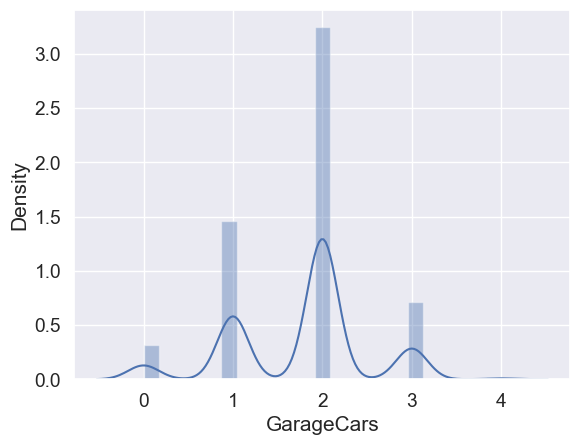

In [ ]:
#GarageCars: plazas de coche en el parking  (si no tendrán superficie, que es continua)
sns.distplot(Z['GarageCars']); #es categorica ordinal

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

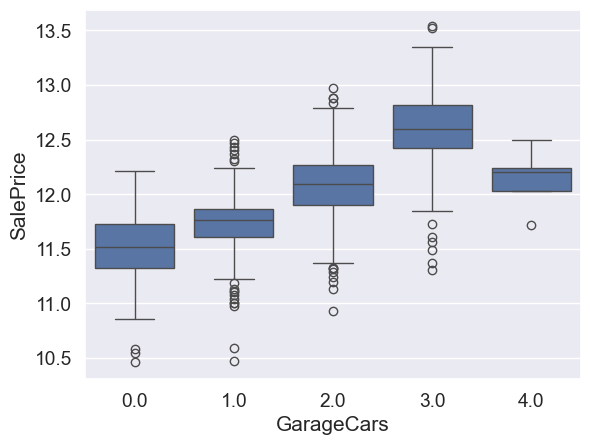

In [ ]:

sns.boxplot(x=Z['GarageCars'], y=Z['SalePrice']) #podemos juntar categorias 3 y 4(porque en 4 hay muy pocas) y 0 y 1

In [ ]:
Z.GarageCars = Z.GarageCars.replace({0:1, 4:3})

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

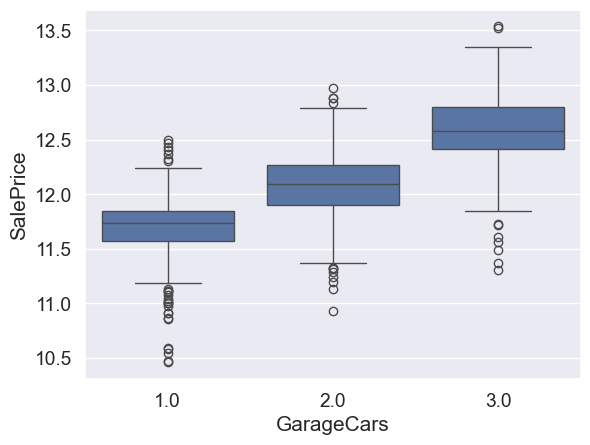

In [ ]:
sns.boxplot(x=Z['GarageCars'], y=Z['SalePrice'])


C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\2177162293.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['1stFlrSF']) #es categorica ordinal


<Axes: xlabel='1stFlrSF', ylabel='Density'>

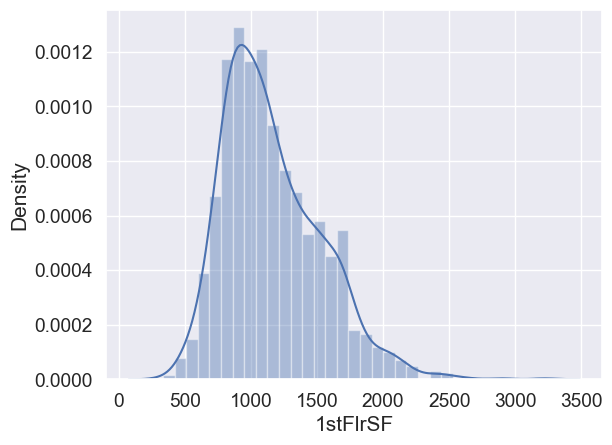

In [ ]:
#1stFlrSF: superficie primera planta
sns.distplot(Z['1stFlrSF']) #es categorica ordinal

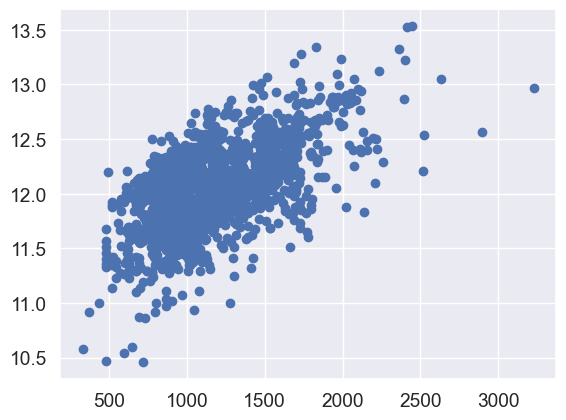

In [ ]:
plt.scatter(Z['1stFlrSF'], Z['SalePrice'])

In [ ]:
Z["1stFlrSF"].skew() #muy asimetrica!

0.887636603215269

In [ ]:
Z["1stFlrSF"] = np.log(Z["1stFlrSF"])

In [ ]:
Z["1stFlrSF"].skew()


0.006100763432043236

C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\3080394279.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['YearBuilt']); #podrías ser continua o categorica


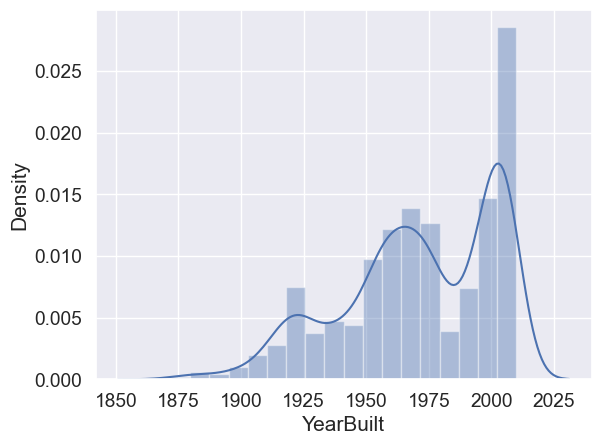

In [ ]:
#YearBuilt: año construccion
sns.distplot(Z['YearBuilt']); #podrías ser continua o categorica

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

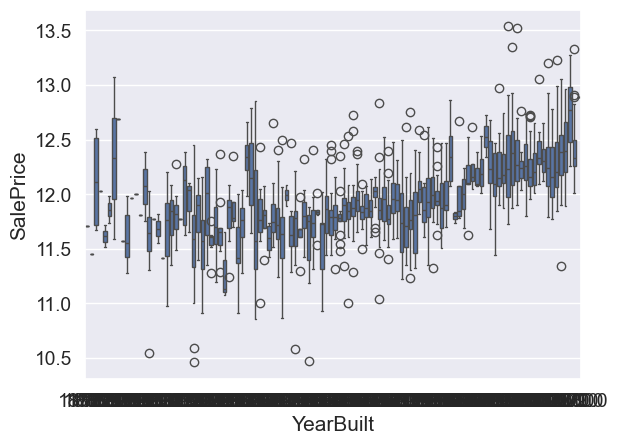

In [ ]:
sns.boxplot(x=Z['YearBuilt'],y= Z['SalePrice']) #crece
#podriamos hacer piece wise, categorizarla... la dejamos como está


C:\Users\Propietario\AppData\Local\Temp\ipykernel_8732\1440160048.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Z['FullBath']); #es continua, pero podemos hacer boxplot


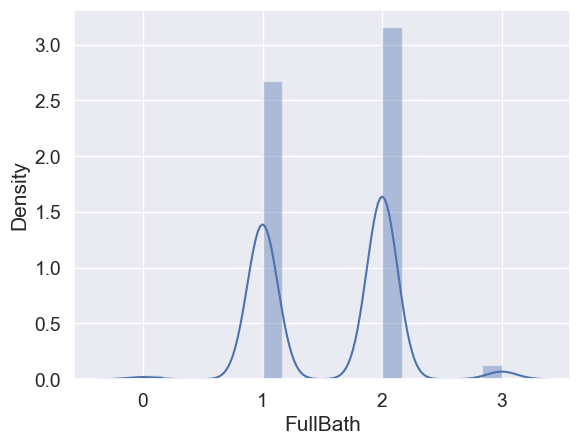

In [ ]:
# FullBath
sns.distplot(Z['FullBath']); #es continua, pero podemos hacer boxplot

<Axes: xlabel='FullBath', ylabel='SalePrice'>

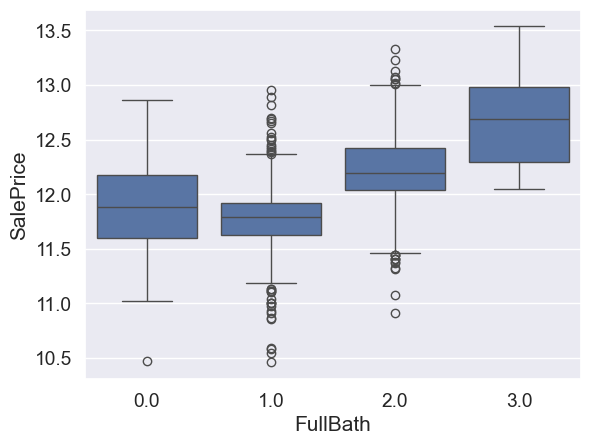

In [ ]:
sns.boxplot(x=Z['FullBath'], y=Z['SalePrice']) #claramente crece, podemos juntar categorias 3 y 2 y 0 y 1 (porque hay muy pocas filas)

In [ ]:
Z['FullBath'] = Z['FullBath'].replace({0:1, 3:2})
Z['FullBath'] = Z['FullBath'].astype('category')

<Axes: xlabel='FullBath', ylabel='SalePrice'>

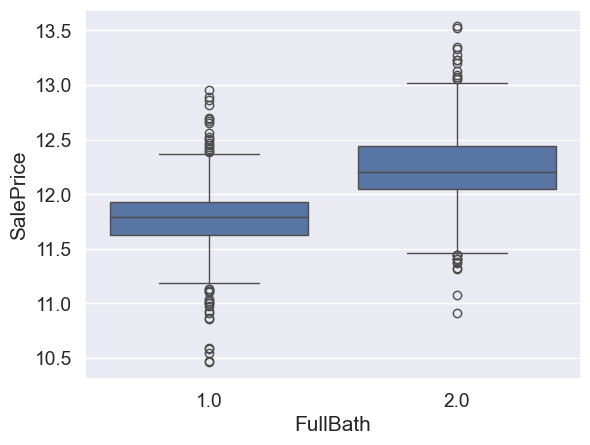

In [ ]:
sns.boxplot(x=Z['FullBath'], y=Z['SalePrice'])

5. Estimación modelo: Ahora vamos a estimar una regresión lineal con las 9 variables anteriores.

Crea las dummy asociadas a las variables categóricas. Recuerda transformarlas a categórica antes [Por ejemplo, OverallQual]

Escala todas las variables continuas con la transformación StandardScaler.

Estima la regresión lineal y calcula el RMSE y el R2.

Calcula los errores.

Grafíca el histograma, ¿se parece a una normal? ¿Hay colas pesadas?

Grafíca el scatter de la predicción vs el error. ¿En qué zona observas mayor dispersión?

Grafíca el scatter de la predicción vs el valor real. ¿Los residuos(errores) tienen varianza constante?



In [ ]:
Z.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd
0,12.247694,3.0,7.444249,2.0,548.0,856.0,6.752270,2.0,2003.0,2003.0
1,12.109011,2.0,7.140453,2.0,460.0,1262.0,7.140453,2.0,1976.0,1976.0
2,12.317167,3.0,7.487734,2.0,608.0,920.0,6.824374,2.0,2001.0,2002.0
3,11.849398,3.0,7.448334,3.0,642.0,756.0,6.867974,1.0,1915.0,1970.0
4,12.429216,3.0,7.695303,3.0,836.0,1145.0,7.043160,2.0,2000.0,2000.0


In [ ]:
Z=pd.get_dummies(Z, drop_first=True)

In [ ]:
Z.head()

,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,YearBuilt,YearRemodAdd,OverallQual_2.0,OverallQual_3.0,FullBath_2.0
0,12.247694,7.444249,2.0,548.0,856.0,6.752270,2003.0,2003.0,False,True,True
1,12.109011,7.140453,2.0,460.0,1262.0,7.140453,1976.0,1976.0,True,False,True
2,12.317167,7.487734,2.0,608.0,920.0,6.824374,2001.0,2002.0,False,True,True
3,11.849398,7.448334,3.0,642.0,756.0,6.867974,1915.0,1970.0,False,True,False
4,12.429216,7.695303,3.0,836.0,1145.0,7.043160,2000.0,2000.0,False,True,True


In [ ]:
X=Z.drop(columns=['SalePrice'])
y=Z['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [ ]:
regresion_lineal = linear_model.LinearRegression() # cargo el objeto modelo
regresion_lineal.fit(X_train, y_train) # ajustamos con nuestros datos

LinearRegression()

In [ ]:
yhat=regresion_lineal.predict(X_test)
r2_score(y_test,yhat)

0.8334213370631041

In [ ]:
mean_squared_error(y_test,yhat)

0.028837336725555017

In [ ]:
errores = y_test-yhat

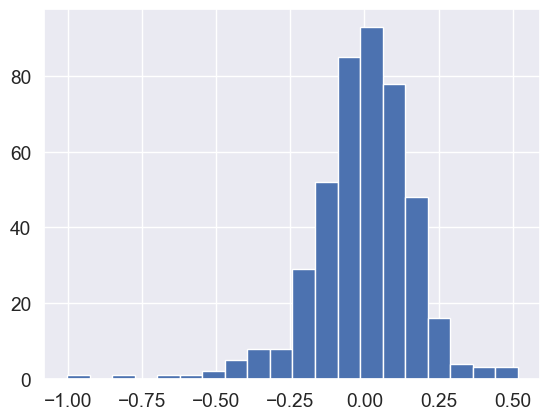

In [ ]:
plt.hist(errores, bins=20)
plt.show()

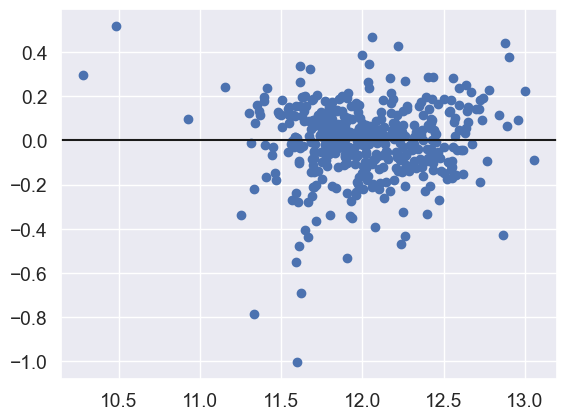

In [ ]:
plt.plot(yhat, errores,'o')
plt.axhline(0,color='k')
plt.show()

In [ ]:
print(yhat.min(),yhat.max())

10.283047279423915 13.05961692215135


In [ ]:

print(y_test.min(),y_test.max())

10.542706391070517 13.323926946863102


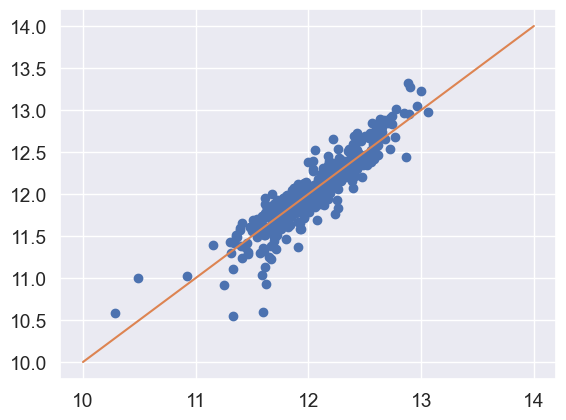

In [ ]:
plt.plot(yhat, y_test,'o')
plt.plot([10,14],[10,14])
plt.show()